# Leverage

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix

In [2]:
path = '../../data/processed/df_filtered.xlsx'
df = pd.read_excel(path)

In [4]:
# レバレッジの計算
def get_leverage(X, data):
    # ハット行列 H の計算
    H = X @ np.linalg.inv(X.T @ X) @ X.T
    # 対角要素を取得
    leverage = np.diag(H)

    data['leverage'] = leverage

    return data

In [5]:
X = dmatrix('C(island_ids) + C(years) + after_treated -1', df)

df_leverage = get_leverage(X, df)

In [56]:
mean_leverage = df_leverage['leverage'].mean()
print(f'平均レバレッジ: {mean_leverage:.4f}')

k = X.shape[1]
n = df.shape[0]
theoretical_value = (k+1) / n
print(f'平均レバレッジの理論値: {theoretical_value:.4f}')

平均レバレッジ: 0.0689
平均レバレッジの理論値: 0.0695


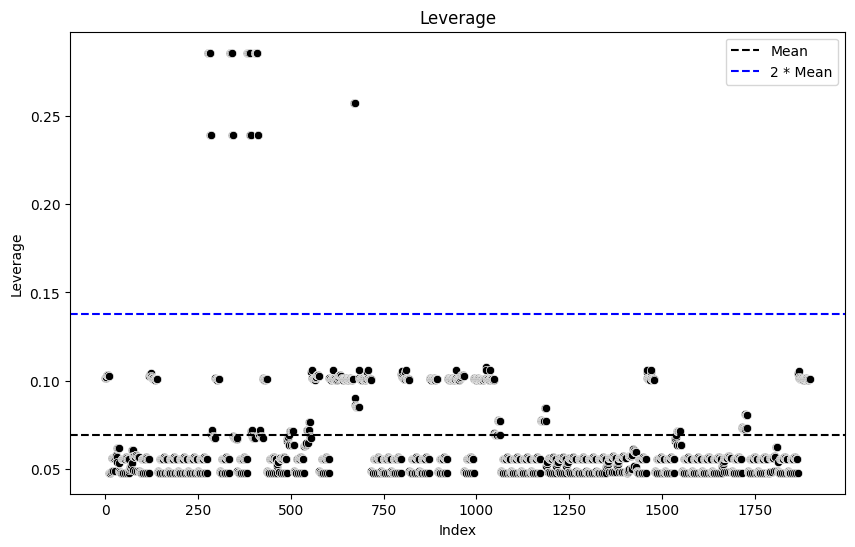

In [77]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_leverage.index, y='leverage', data=df_leverage, color='black')
plt.xlabel('Index')
plt.ylabel('Leverage')
plt.title('Leverage')
plt.axhline(mean_leverage, color='black', linestyle='--', label='Mean')
plt.axhline(2 *mean_leverage, color='blue', linestyle='--', label='2 * Mean')
plt.legend()
plt.show()

In [79]:
df['leverage'].max()
2 * mean_leverage

array(0.13789474)

In [80]:
len(df[df['leverage'] > 2 * theoretical_value]) / len(df)

0.022631578947368423